# Introdução

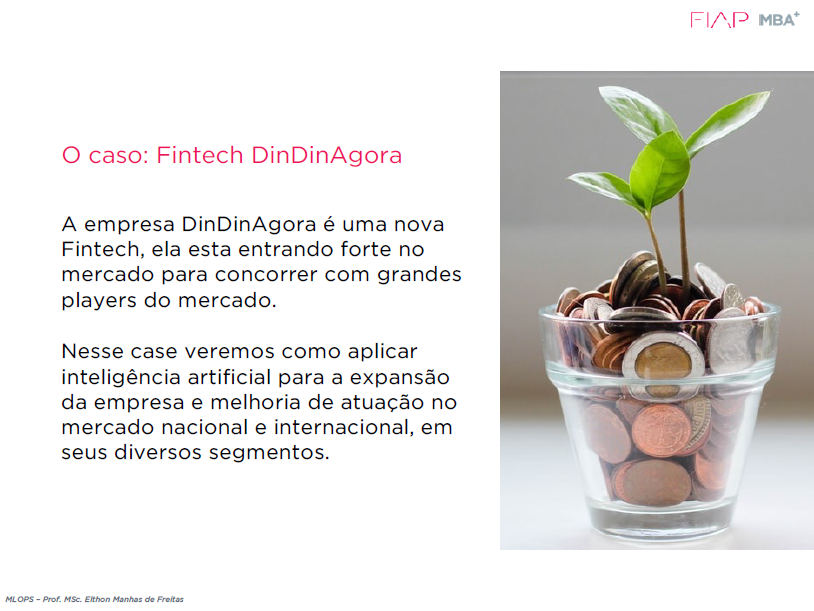

Abaixo está o dicionário de dados:

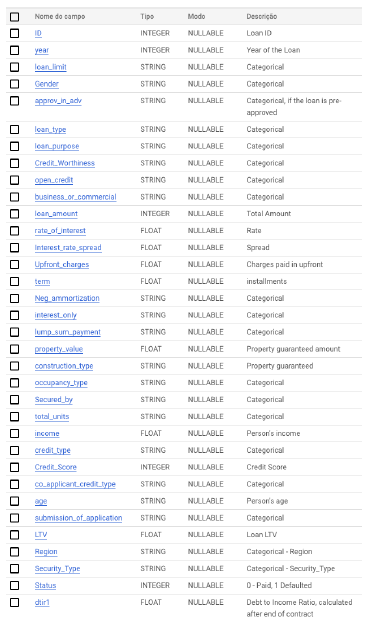




# Bibliotecas

Os blocos de código abaixo faz-se necessário rodar para importar todos as bibliotecas que serão usadas.

In [ ]:
!git clone https://github.com/vinipires1/Exercicio-MLOPS.git
!pip install -r Exercicio-MLOPS/requirements.txt

In [2]:
# importa as bibliotecas
# manipulacao dos dados
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import gdown
from google.colab import files
import joblib
import requests
import json

# graficos
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

# modelo e metricas
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Análise Exploratória e Engenharia de Dados

In [4]:
# faz download do dataset direto do google drive
url = 'https://drive.google.com/uc?export=download&id=1-nyUJozadTz89cVwUuHF9av3y8la7MFy'
output = 'data_fintech'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1-nyUJozadTz89cVwUuHF9av3y8la7MFy
To: /content/data_fintech
100%|██████████| 27.1M/27.1M [00:00<00:00, 85.4MB/s]


'data_fintech'

In [5]:
# transforma dataset baixado em dataframe
df = pd.read_csv('data_fintech')

# mostra as primeiras 5 linhas
df.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co_applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
1,24932,2019,cf,Male,nopre,type3,p4,l1,nopc,nob/c,...,EQUI,765,EXP,45-54,to_inst,NaN,North,direct,1,NaN
2,25039,2019,cf,Male,nopre,type2,p3,l1,nopc,b/c,...,EQUI,880,EXP,35-44,to_inst,NaN,North,direct,1,NaN
3,25101,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EQUI,880,EXP,45-54,to_inst,NaN,central,direct,1,NaN
4,25110,2019,cf,Male,nopre,type3,p3,l1,nopc,nob/c,...,EQUI,768,EXP,45-54,not_inst,NaN,North,direct,1,NaN


In [6]:
# informacoes sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

O dataset contém 148.670 linhas e 34 variáveis.

Partindo da premissa dos nossos problemas, que são a clusterização dos clientes em grupos com características semelhantes e a propensão à inadimplência, definimos a variável ***Status*** como variável target. A seguir, iremos verificar a distriuição dos dados dela, sendo: ***0*** para ***Adimplente*** e ***1*** para ***Inadimplente***.

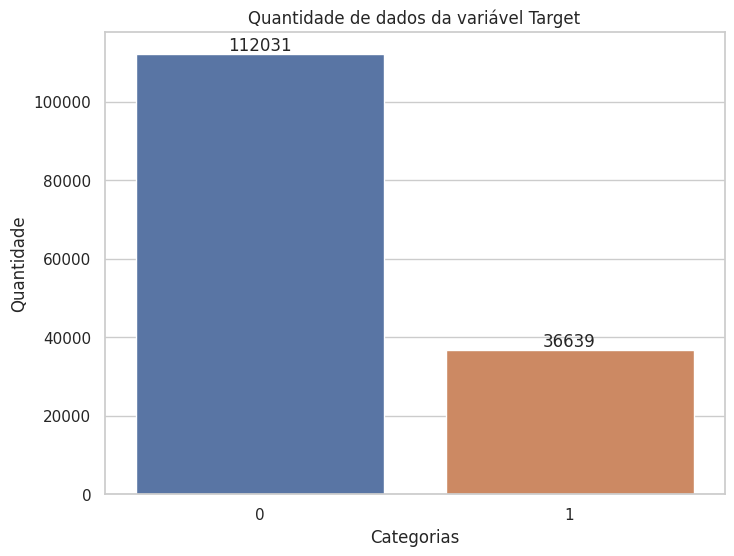

In [7]:
# grafico da variavel target
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x=df['Status'], ax=ax)
ax.bar_label(ax.containers[0])
plt.xlabel('Categorias')
plt.ylabel('Quantidade')
plt.title('Quantidade de dados da variável Target')
plt.show()

Nota-se que a classe ***0*** ***Adimplente***, está ligeiramente com mais dados do que a outra classe, sendo 112.031 dados contra 36.639, respectivamente.

A seguir, para descobrirmos como está o dataset em relação a quantidade de nulos, iremos fazer algumas inferências.

In [8]:
# mostra a quantidade e porcentagem de nulos
nulos = df.isnull().sum()
porcentagem = ((nulos / len(df)) * 100).round(2)
pd.DataFrame({'Quantidade de Nulos':nulos, 'Porcentagem':porcentagem})

,Quantidade de Nulos,Porcentagem
ID,0,0.00
year,0,0.00
loan_limit,3344,2.25
Gender,0,0.00
approv_in_adv,908,0.61
loan_type,0,0.00
loan_purpose,134,0.09
Credit_Worthiness,0,0.00
open_credit,0,0.00
business_or_commercial,0,0.00


Observa-se a presença de valores nulos em algumas variáveis, portanto, definimos que as variáveis que possuirem mais de 10% de nulos serão excluidas.

In [9]:
# Identificar as colunas que têm mais de 10 por cento de valores nulos
colunas_a_excluir = porcentagem[porcentagem >= 10].index
df_filtrado = df.drop(columns=colunas_a_excluir)
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  term                       148629 non-null  float64
 12  Neg_ammortization          148549 non-null  object 
 13  interest_only              14

In [10]:
# mostra a quantidade e porcentagem de nulos
nulos1 = df_filtrado.isnull().sum()
porcentagem1 = ((nulos1 / len(df_filtrado)) * 100).round(2)
pd.DataFrame({'Quantidade de Nulos':nulos1, 'Porcentagem':porcentagem1})

,Quantidade de Nulos,Porcentagem
ID,0,0.00
year,0,0.00
loan_limit,3344,2.25
Gender,0,0.00
approv_in_adv,908,0.61
loan_type,0,0.00
loan_purpose,134,0.09
Credit_Worthiness,0,0.00
open_credit,0,0.00
business_or_commercial,0,0.00


Após a exclusão das colunas que possuem mais de 10% de nulos, iremos dropar os valores nulos que sobraram nas outas variáveis.

In [11]:
# remove valores nulos restantes
df_filtrado.dropna(inplace=True)

In [12]:
# reseta o index do dataset
df_filtrado.reset_index(drop=True)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,total_units,income,credit_type,Credit_Score,co_applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,1U,4980.00,EQUI,552,EXP,55-64,to_inst,North,direct,1
1,24932,2019,cf,Male,nopre,type3,p4,l1,nopc,nob/c,...,1U,0.00,EQUI,765,EXP,45-54,to_inst,North,direct,1
2,25039,2019,cf,Male,nopre,type2,p3,l1,nopc,b/c,...,1U,8640.00,EQUI,880,EXP,35-44,to_inst,North,direct,1
3,25101,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,1U,1680.00,EQUI,880,EXP,45-54,to_inst,central,direct,1
4,25110,2019,cf,Male,nopre,type3,p3,l1,nopc,nob/c,...,1U,7560.00,EQUI,768,EXP,45-54,not_inst,North,direct,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135103,157847,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,1U,4920.00,CIB,784,EXP,>74,to_inst,south,direct,0
135104,164194,2019,cf,Sex Not Available,nopre,type1,p4,l1,nopc,nob/c,...,1U,4800.00,CRIF,851,CIB,35-44,to_inst,south,direct,0
135105,165831,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,1U,7920.00,CRIF,645,EXP,65-74,to_inst,south,direct,0
135106,100880,2019,cf,Sex Not Available,nopre,type2,p3,l1,nopc,b/c,...,1U,11700.00,CIB,525,EXP,55-64,to_inst,south,direct,1


In [13]:
# mostra os valores unicos da varivael 'age'
df_filtrado['age'].unique()

array(['55-64', '45-54', '35-44', '>74', '25-34', '65-74', '<25'],
      dtype=object)

In [14]:
# informacoes sobre o dataset
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135108 entries, 0 to 148669
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         135108 non-null  int64  
 1   year                       135108 non-null  int64  
 2   loan_limit                 135108 non-null  object 
 3   Gender                     135108 non-null  object 
 4   approv_in_adv              135108 non-null  object 
 5   loan_type                  135108 non-null  object 
 6   loan_purpose               135108 non-null  object 
 7   Credit_Worthiness          135108 non-null  object 
 8   open_credit                135108 non-null  object 
 9   business_or_commercial     135108 non-null  object 
 10  loan_amount                135108 non-null  int64  
 11  term                       135108 non-null  float64
 12  Neg_ammortization          135108 non-null  object 
 13  interest_only              13

Após todas essas remoções, o dataset ficou com 135.108 linhas. Sendo assim, agora iremos remover os valores duplicados.

In [15]:
# remove dados duplicados
df_filtrado.drop_duplicates(inplace=True)

In [16]:
# informacoes sobre o dataset
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135108 entries, 0 to 148669
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         135108 non-null  int64  
 1   year                       135108 non-null  int64  
 2   loan_limit                 135108 non-null  object 
 3   Gender                     135108 non-null  object 
 4   approv_in_adv              135108 non-null  object 
 5   loan_type                  135108 non-null  object 
 6   loan_purpose               135108 non-null  object 
 7   Credit_Worthiness          135108 non-null  object 
 8   open_credit                135108 non-null  object 
 9   business_or_commercial     135108 non-null  object 
 10  loan_amount                135108 non-null  int64  
 11  term                       135108 non-null  float64
 12  Neg_ammortization          135108 non-null  object 
 13  interest_only              13

Nota-se que o dataset não contém dados duplicados, mantendo-se a mesma quantidade de linhas.

In [17]:
# mostra os valores unicos da varivael 'year'
df_filtrado['year'].unique()

array([2019])

In [18]:
# mostra as 5 primeiras linhas
df_filtrado.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,total_units,income,credit_type,Credit_Score,co_applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,1U,4980.00,EQUI,552,EXP,55-64,to_inst,North,direct,1
1,24932,2019,cf,Male,nopre,type3,p4,l1,nopc,nob/c,...,1U,0.00,EQUI,765,EXP,45-54,to_inst,North,direct,1
2,25039,2019,cf,Male,nopre,type2,p3,l1,nopc,b/c,...,1U,8640.00,EQUI,880,EXP,35-44,to_inst,North,direct,1
3,25101,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,1U,1680.00,EQUI,880,EXP,45-54,to_inst,central,direct,1
4,25110,2019,cf,Male,nopre,type3,p3,l1,nopc,nob/c,...,1U,7560.00,EQUI,768,EXP,45-54,not_inst,North,direct,1


O código abaixo remove as variaveis ID e Year por não serem necessárias, pois a coluna ID pode criar viéz no modelo e a a variável Year só contem um unico valor, que representa o ano de 2019.

In [19]:
# deleta as colunas ID e Ano
df_filtrado.drop(columns = ['ID', 'year'], inplace=True)

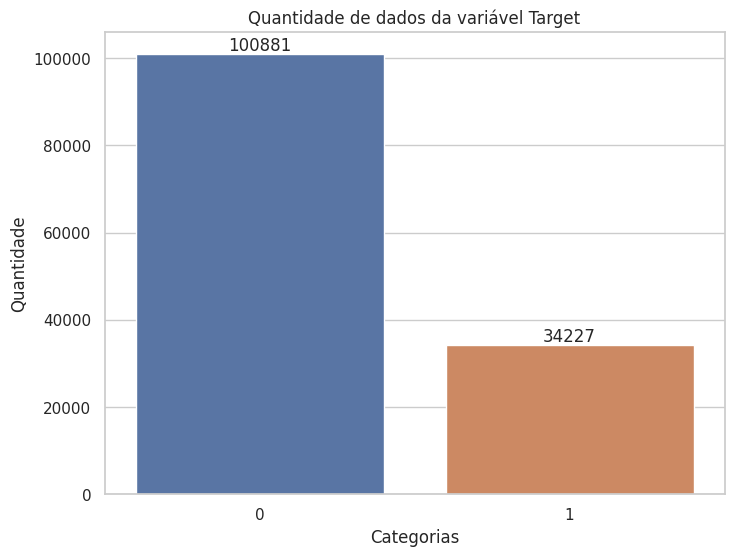

In [20]:
# grafico da variavel target
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x=df_filtrado['Status'], ax=ax1)
ax1.bar_label(ax1.containers[0])
plt.xlabel('Categorias')
plt.ylabel('Quantidade')
plt.title('Quantidade de dados da variável Target')
plt.show()

Após todas as alterações no dataset, o mesmo ficou com 135.108 linhas e 28 variaveis.

A seguir iremos categorizar algumas variáveis e dividir o dataset em treino e teste, 70% e 30% dos dados, respectivamente. E após, fazer um feature importance para verificar quais variáveis a arvore de decisão interpreta como mais importante, e selecionaremos elas para treinar o modelo.

# Pré Processamento

In [21]:
# copia o dataset para outro objeto
df_novo = df_filtrado.copy()

In [22]:
# informacoes do dataset
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135108 entries, 0 to 148669
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 135108 non-null  object 
 1   Gender                     135108 non-null  object 
 2   approv_in_adv              135108 non-null  object 
 3   loan_type                  135108 non-null  object 
 4   loan_purpose               135108 non-null  object 
 5   Credit_Worthiness          135108 non-null  object 
 6   open_credit                135108 non-null  object 
 7   business_or_commercial     135108 non-null  object 
 8   loan_amount                135108 non-null  int64  
 9   term                       135108 non-null  float64
 10  Neg_ammortization          135108 non-null  object 
 11  interest_only              135108 non-null  object 
 12  lump_sum_payment           135108 non-null  object 
 13  construction_type          13

In [23]:
# cria um objeto LabelEncoder
label_encoder = LabelEncoder()

# lista as colunas do DataFrame que sao do tipo 'object'
colunas_object = df_novo.select_dtypes(include=['object']).columns

# itera sobre as colunas e aplica o LabelEncoder
for coluna in colunas_object:
    df_novo[coluna] = label_encoder.fit_transform(df_novo[coluna])

In [24]:
# mostra as 5 primeiras linhas
df_novo.head(5)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,...,total_units,income,credit_type,Credit_Score,co_applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,0,2,0,1,0,0,0,0,206500,360.00,...,0,4980.00,2,552,1,3,1,0,1,1
1,0,2,0,2,3,0,0,1,466500,360.00,...,0,0.00,2,765,1,2,1,0,1,1
2,0,2,0,1,2,0,0,0,656500,360.00,...,0,8640.00,2,880,1,1,1,0,1,1
3,0,2,0,0,3,0,0,1,106500,240.00,...,0,1680.00,2,880,1,2,1,2,1,1
4,0,2,0,2,2,0,0,1,406500,360.00,...,0,7560.00,2,768,1,2,0,0,1,1


In [25]:
# informacoes do dataset
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135108 entries, 0 to 148669
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 135108 non-null  int64  
 1   Gender                     135108 non-null  int64  
 2   approv_in_adv              135108 non-null  int64  
 3   loan_type                  135108 non-null  int64  
 4   loan_purpose               135108 non-null  int64  
 5   Credit_Worthiness          135108 non-null  int64  
 6   open_credit                135108 non-null  int64  
 7   business_or_commercial     135108 non-null  int64  
 8   loan_amount                135108 non-null  int64  
 9   term                       135108 non-null  float64
 10  Neg_ammortization          135108 non-null  int64  
 11  interest_only              135108 non-null  int64  
 12  lump_sum_payment           135108 non-null  int64  
 13  construction_type          13

In [26]:
# passa o dataset para outro objeto
X = df_novo.copy()

In [27]:
# dropa a coluna 'Staus'
X.drop(columns=['Status'], inplace=True)

In [28]:
# passa a variavel target 'Status' para outro objeto
y = df_filtrado['Status']

# muda o tipo da variavel target para str
y = y.astype(str)

# Feature Importance

Pelo fato de termos diversas variáveis, aplicaremos a técnica da árvore de decisão para elencar as variáveis mais importantes.

In [29]:
# cria uma arvore de decisao
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)
feature_importances = clf.feature_importances_

# combina o nome da varivael com a importancia e ordena por ordem decrescente
feature_importance_pairs = list(zip(X, feature_importances))
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# printa as variaveis e a importancia
for feature, importance in sorted_feature_importance_pairs:
    print(f"{feature}: {importance}")

credit_type: 0.36890482670353403
Credit_Score: 0.14665860283357862
income: 0.13442312573275758
loan_amount: 0.1099950258839293
age: 0.04431907808772916
loan_purpose: 0.02486515155140172
Gender: 0.02414215545312639
lump_sum_payment: 0.02050416689221586
Region: 0.01725845185162779
term: 0.01665842121003789
Credit_Worthiness: 0.01566602696659002
Neg_ammortization: 0.01243665031351535
approv_in_adv: 0.01144425826070076
co_applicant_credit_type: 0.009947836478968282
submission_of_application: 0.008476793079701955
loan_type: 0.0068167389855384765
occupancy_type: 0.0065502771447010525
business_or_commercial: 0.005928990365831495
interest_only: 0.0055046630633770535
loan_limit: 0.0053836977404464175
total_units: 0.003509694069950169
Secured_by: 0.0002490930572478947
Security_Type: 0.00016562551315230299
open_credit: 0.00012710809179421317
construction_type: 6.354066854614458e-05


Após utilizarmos a arvore de decisão para verificar quais variáveis ela classifica como mais imoprtante, utilizaremos as que possuem mais de 2% de relevância, sendo elas:  
credit_type: 36,89%  
Credit_Score: 14,66%  
income: 13,44%  
loan_amount: 10,99%  
age: 04,43%  
loan_purpose: 02,48%   
Gender: 02,41%  
lump_sum_payment: 02,05%  

In [30]:
# passa as variaveis escolhidas para outro objeto
var_independentes = df_filtrado[['credit_type', 'Credit_Score', 'income', 'loan_amount', 'age',
                                 'loan_purpose', 'Gender', 'lump_sum_payment']]

In [31]:
# informacoes do dataset
var_independentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135108 entries, 0 to 148669
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   credit_type       135108 non-null  object 
 1   Credit_Score      135108 non-null  int64  
 2   income            135108 non-null  float64
 3   loan_amount       135108 non-null  int64  
 4   age               135108 non-null  object 
 5   loan_purpose      135108 non-null  object 
 6   Gender            135108 non-null  object 
 7   lump_sum_payment  135108 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.3+ MB


In [32]:
# transforma as variaveis em str
var_independentes['credit_type'] = var_independentes['credit_type'].astype(str)
var_independentes['age'] = var_independentes['age'].astype(str)
var_independentes['loan_purpose'] = var_independentes['loan_purpose'].astype(str)
var_independentes['Gender'] = var_independentes['Gender'].astype(str)
var_independentes['lump_sum_payment'] = var_independentes['lump_sum_payment'].astype(str)

<ipython-input-32-110f7e7a5f8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_independentes['credit_type'] = var_independentes['credit_type'].astype(str)
<ipython-input-32-110f7e7a5f8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_independentes['age'] = var_independentes['age'].astype(str)
<ipython-input-32-110f7e7a5f8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [33]:
# informacoes do dataset
var_independentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135108 entries, 0 to 148669
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   credit_type       135108 non-null  object 
 1   Credit_Score      135108 non-null  int64  
 2   income            135108 non-null  float64
 3   loan_amount       135108 non-null  int64  
 4   age               135108 non-null  object 
 5   loan_purpose      135108 non-null  object 
 6   Gender            135108 non-null  object 
 7   lump_sum_payment  135108 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.3+ MB


In [34]:
# mostra as 5 primeiras linhas
var_independentes.head(5)

,credit_type,Credit_Score,income,loan_amount,age,loan_purpose,Gender,lump_sum_payment
0,EQUI,552,4980.00,206500,55-64,p1,Male,lpsm
1,EQUI,765,0.00,466500,45-54,p4,Male,not_lpsm
2,EQUI,880,8640.00,656500,35-44,p3,Male,not_lpsm
3,EQUI,880,1680.00,106500,45-54,p4,Male,lpsm
4,EQUI,768,7560.00,406500,45-54,p3,Male,not_lpsm


In [35]:
# lista as colunas do dataset que sao do tipo 'object'
colunas_object = var_independentes.select_dtypes(include=['object']).columns

# itera sobre as colunas e aplica o LabelEncoder
for coluna in colunas_object:
    var_independentes[coluna] = label_encoder.fit_transform(var_independentes[coluna])
    # salva o modelo LabelEncoder com o nome da variavel a cada iteracao
    #modelo_label_encoder_filename = f'Exercicio-MLOPS/models/{coluna}_label_encoder.joblib'
    #joblib.dump(label_encoder, modelo_label_encoder_filename)

<ipython-input-35-a607634c2a92>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_independentes[coluna] = label_encoder.fit_transform(var_independentes[coluna])
<ipython-input-35-a607634c2a92>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_independentes[coluna] = label_encoder.fit_transform(var_independentes[coluna])
<ipython-input-35-a607634c2a92>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



# Clusterização e Classificação

## Cluster

Abaixo está po método elbow (cotovelo) para verificar a quantidade ideal de clusters.

Text(0, 0.5, 'Within-Cluster-Sum-of-Squares')

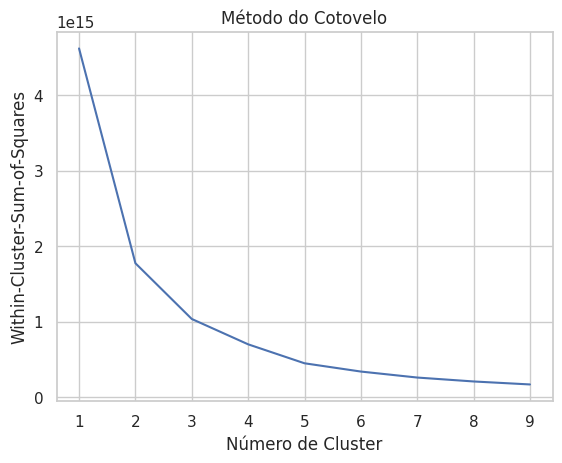

In [36]:
# metodo do cotovelo para verificar a quantidade de clusters
wcss = []
for i in range(1, 10):
  modelo_teste = KMeans(n_clusters = i, init = 'k-means++', n_init = 20, max_iter = 300, random_state = 42)
  modelo_teste.fit(var_independentes)
  wcss.append(modelo_teste.inertia_)

# plota o grafico
plt.plot(range(1,10), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Cluster')
plt.ylabel('Within-Cluster-Sum-of-Squares')

Após a técnica elbow (método do cotovelo), foi averiguado que 3 clusters é o ideal para nossos dados, portanto, faremos 3 clusters e atribuiremos as seguintes personas a cada um:  
0 = Bronze  
1 = Prata  
2 = Ouro

In [37]:
# treina o modelo com 3 clusters
k_modelo = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 42)
clusters = k_modelo.fit_predict(var_independentes)
var_independentes['cluster'] = clusters

<ipython-input-37-9fe76e214e8c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_independentes['cluster'] = clusters


In [38]:
# informacoes do dataset
var_independentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135108 entries, 0 to 148669
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   credit_type       135108 non-null  int64  
 1   Credit_Score      135108 non-null  int64  
 2   income            135108 non-null  float64
 3   loan_amount       135108 non-null  int64  
 4   age               135108 non-null  int64  
 5   loan_purpose      135108 non-null  int64  
 6   Gender            135108 non-null  int64  
 7   lump_sum_payment  135108 non-null  int64  
 8   cluster           135108 non-null  int32  
dtypes: float64(1), int32(1), int64(7)
memory usage: 9.8 MB


In [39]:
# atribui as personas a cada cliente
var_independentes['persona'] = var_independentes['cluster'].replace({0:'Bronze', 1:'Prata', 2:'Ouro'})

<ipython-input-39-035efbb9c586>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_independentes['persona'] = var_independentes['cluster'].replace({0:'Bronze', 1:'Prata', 2:'Ouro'})


In [40]:
# mostra as 5 primeiras linhas
var_independentes.head(5)

,credit_type,Credit_Score,income,loan_amount,age,loan_purpose,Gender,lump_sum_payment,cluster,persona
0,2,552,4980.00,206500,3,0,2,0,0,Bronze
1,2,765,0.00,466500,2,3,2,1,2,Ouro
2,2,880,8640.00,656500,1,2,2,1,1,Prata
3,2,880,1680.00,106500,2,3,2,0,0,Bronze
4,2,768,7560.00,406500,2,2,2,1,2,Ouro


In [41]:
# salva o modelo em joblib
#joblib.dump(k_modelo, 'Exercicio-MLOPS/modelos/modelo_kmeans.joblib')
#print("Modelo K-Means salvo com sucesso.")

### Análise dos Clusters

#### Cluster 0 = Bronze

In [42]:
cluster0 = var_independentes[var_independentes['cluster'] == 0]

In [43]:
# informacoes do dataset
cluster0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66145 entries, 0 to 148666
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_type       66145 non-null  int64  
 1   Credit_Score      66145 non-null  int64  
 2   income            66145 non-null  float64
 3   loan_amount       66145 non-null  int64  
 4   age               66145 non-null  int64  
 5   loan_purpose      66145 non-null  int64  
 6   Gender            66145 non-null  int64  
 7   lump_sum_payment  66145 non-null  int64  
 8   cluster           66145 non-null  int32  
 9   persona           66145 non-null  object 
dtypes: float64(1), int32(1), int64(7), object(1)
memory usage: 5.3+ MB


In [44]:
# transforma as variaveis em str
cluster0['credit_type'] = cluster0['credit_type'].astype(str)
cluster0['age'] = cluster0['age'].astype(str)
cluster0['loan_purpose'] = cluster0['loan_purpose'].astype(str)
cluster0['Gender'] = cluster0['Gender'].astype(str)
cluster0['lump_sum_payment'] = cluster0['lump_sum_payment'].astype(str)
cluster0['cluster'] = cluster0['cluster'].astype(str)

<ipython-input-44-056ce6eff054>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0['credit_type'] = cluster0['credit_type'].astype(str)
<ipython-input-44-056ce6eff054>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0['age'] = cluster0['age'].astype(str)
<ipython-input-44-056ce6eff054>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [45]:
cluster0.describe()

,Credit_Score,income,loan_amount
count,66145.00,66145.00,66145.00
mean,699.36,4788.16,187751.49
std,116.04,3743.75,62570.74
min,500.00,0.00,16500.00
25%,599.00,2820.00,136500.00
50%,699.00,3960.00,196500.00
75%,800.00,5760.00,236500.00
max,900.00,186480.00,286500.00


#### Cluster 1 = Prata

In [46]:
cluster1 = var_independentes[var_independentes['cluster'] == 1]

In [47]:
# informacoes do dataset
cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17305 entries, 2 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_type       17305 non-null  int64  
 1   Credit_Score      17305 non-null  int64  
 2   income            17305 non-null  float64
 3   loan_amount       17305 non-null  int64  
 4   age               17305 non-null  int64  
 5   loan_purpose      17305 non-null  int64  
 6   Gender            17305 non-null  int64  
 7   lump_sum_payment  17305 non-null  int64  
 8   cluster           17305 non-null  int32  
 9   persona           17305 non-null  object 
dtypes: float64(1), int32(1), int64(7), object(1)
memory usage: 1.4+ MB


In [48]:
# transforma as variaveis em str
cluster1['credit_type'] = cluster1['credit_type'].astype(str)
cluster1['age'] = cluster1['age'].astype(str)
cluster1['loan_purpose'] = cluster1['loan_purpose'].astype(str)
cluster1['Gender'] = cluster1['Gender'].astype(str)
cluster1['lump_sum_payment'] = cluster1['lump_sum_payment'].astype(str)
cluster1['cluster'] = cluster1['cluster'].astype(str)

<ipython-input-48-01e77e83aaf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['credit_type'] = cluster1['credit_type'].astype(str)
<ipython-input-48-01e77e83aaf8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['age'] = cluster1['age'].astype(str)
<ipython-input-48-01e77e83aaf8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [49]:
cluster1.describe()

,Credit_Score,income,loan_amount
count,17305.00,17305.00,17305.00
mean,701.15,12258.39,671905.95
std,116.04,11260.12,176669.40
min,500.00,0.00,536500.00
25%,600.00,7920.00,576500.00
50%,702.00,10200.00,626500.00
75%,803.00,13740.00,706500.00
max,900.00,578580.00,3576500.00


#### Cluster 2 = Ouro


In [50]:
cluster2 = var_independentes[var_independentes['cluster'] == 2]

In [51]:
# informacoes do dataset
cluster2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51658 entries, 1 to 148642
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_type       51658 non-null  int64  
 1   Credit_Score      51658 non-null  int64  
 2   income            51658 non-null  float64
 3   loan_amount       51658 non-null  int64  
 4   age               51658 non-null  int64  
 5   loan_purpose      51658 non-null  int64  
 6   Gender            51658 non-null  int64  
 7   lump_sum_payment  51658 non-null  int64  
 8   cluster           51658 non-null  int32  
 9   persona           51658 non-null  object 
dtypes: float64(1), int32(1), int64(7), object(1)
memory usage: 4.1+ MB


In [52]:
# transforma as variaveis em str
cluster2['credit_type'] = cluster2['credit_type'].astype(str)
cluster2['age'] = cluster2['age'].astype(str)
cluster2['loan_purpose'] = cluster2['loan_purpose'].astype(str)
cluster2['Gender'] = cluster2['Gender'].astype(str)
cluster2['lump_sum_payment'] = cluster2['lump_sum_payment'].astype(str)
cluster2['cluster'] = cluster2['cluster'].astype(str)

<ipython-input-52-6e8d5ad1de38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2['credit_type'] = cluster2['credit_type'].astype(str)
<ipython-input-52-6e8d5ad1de38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2['age'] = cluster2['age'].astype(str)
<ipython-input-52-6e8d5ad1de38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [53]:
cluster2.describe()

,Credit_Score,income,loan_amount
count,51658.00,51658.00,51658.00
mean,699.83,7973.24,396236.54
std,115.55,5793.31,66737.60
min,500.00,0.00,296500.00
25%,600.00,5220.00,336500.00
50%,699.00,6900.00,386500.00
75%,800.00,9300.00,456500.00
max,900.00,377220.00,526500.00


## Classificação

### Random Forest

In [60]:
# passa o dataset para outro objeto
var_independentes_cla = var_independentes.copy()

# exclui variavel cluster
var_independentes_cla.drop(columns=['cluster'], inplace=True)

# dropa a variavel 'persona'
var_independentes_cla.drop(columns=['persona'], inplace=True)

# mostra as 5 primeiras linhas
var_independentes_cla.head(5)

,credit_type,Credit_Score,income,loan_amount,age,loan_purpose,Gender,lump_sum_payment
0,2,552,4980.00,206500,3,0,2,0
1,2,765,0.00,466500,2,3,2,1
2,2,880,8640.00,656500,1,2,2,1
3,2,880,1680.00,106500,2,3,2,0
4,2,768,7560.00,406500,2,2,2,1


In [61]:
# divide os dados em conjuntos de treino (70% do dados) e teste (30% do dados)
X_train, X_test, y_train, y_test = train_test_split(var_independentes_cla, y, test_size=0.3, random_state=42)

In [62]:
# treina a random forest
random_forest = rfc(n_estimators=100, random_state=42)
modelo_random_forest = random_forest.fit(X_train, y_train)

# faz o predict no dataset de teste
y_pred = modelo_random_forest.predict(X_test)

# métricas obtidas
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     30276
           1       0.90      0.51      0.65     10257

    accuracy                           0.86     40533
   macro avg       0.88      0.75      0.78     40533
weighted avg       0.87      0.86      0.85     40533



In [ ]:
# salva o modelo em joblib
#joblib.dump(modelo_random_forest, 'modelo_randomforest.joblib')
#print("Modelo K-Means salvo com sucesso.")

### XGBOOST

In [ ]:
# transforma as variaveis target em 'Int64' para poder rodar o XGBOOST
y_train_xgb = y_train.astype('Int64')
y_test_xgb = y_test.astype('Int64')

# treina o modelo XGBOOST para classificao
xgb = XGBClassifier(random_state = 42)
modelo_xgb = xgb.fit(X_train, y_train_xgb)

# predict do modelo
y_pred_xgb = modelo_xgb.predict(X_test)

# metricas
report = classification_report(y_test_xgb, y_pred_xgb)
print(f'Relatório de classificação:\n{report}')

In [ ]:
# salva o modelo em joblib
joblib.dump(modelo_xgb, 'modelo_xgb.joblib')
print("Modelo K-Means salvo com sucesso.")

Após a criação de dois modelos, ***random forest*** e ***xgboost***, verificamos, de acordo com as métricas, que o ***xgboost*** perfomou mais, obtendo uma ***acurácia*** de ***87%*** contra ***86%*** da ***random forest.*** Ambos os modelos poderiam ser aplicados à esse problema, porém, preferimos utilizar o ***xgboost***, pelo resultado das métricas e por ser um modelo mais leve para subir ao repositório do GitHub.

# Propensão à Inadimplência

## Regressão Logística

In [68]:
# treina o modelo de regressao
modelo_regressao = LogisticRegression()
regressao = modelo_regressao.fit(X_train, y_train)

# preve a probabilidade de inadimplencia
y_pred_reg = regressao.predict(X_test)

# calcula a acuracia
acuracia = (accuracy_score(y_test, y_pred_reg)).round(4) * 100
print(f'Acurácia da Regressão Logística: {acuracia}%')

Acurácia da Regressão Logística: 74.69%


In [ ]:
# salva o modelo em joblib
#joblib.dump(regressao, 'modelo_regressao.joblib')
#print("Modelo Regressão salvo com sucesso.")

Modelo Regressão salvo com sucesso.


O modelode Regressão Logística chegou a uma acurácia de 74.69%, sem mexer em nenhum hiperparâmetro, uma métrica relativamente boa. Como o nosso foco é subir esses modelos e não obter o melhor modelo, aplicaremos ele para predizer a probabilidade de ser fraude.

# Faz download dos Modelos

In [ ]:
# faz download do modelo_randomforest
files.download('modelo_randomforest.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# faz download do modelo_regressao
files.download('modelo_regressao.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# faz download do modelo_regressao
files.download('modelo_xgb.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusão

Portanto, conclui-se que os modelos ***xgboost*** e ***regressão logística*** serão utilizados em nossas predições futuras, pelos motivos citados anteriormente, tanto pela acurácia aceitável, quanto por serem modelos leves para subir no repositório onde ficara salvo, que posteriormente serão chamados através de uma API e consumidos nos blocos de código abaixo. Os resultados obtidos são satisfatórios para os problemas que possuimos.

# Análise de Crédito e Propensão à Fraude

In [90]:
# declara IP e porta
SERVER_IP = '74.249.41.79'
SERVER_PORT = '443'

In [105]:
# passa dados do cliente
cliente = [{'credit_type':'CIB',
            'Credit_Score':15000,
            'income':6500000,
            'loan_amount':15000000,
            'age':'45-54',
            'loan_purpose':'p1',
            'Gender':'Male',
            'lump_sum_payment':'lpsm'}]

In [106]:
# codifica os dados do cliente para JSON
je = json.JSONEncoder()
dados = je.encode(cliente)
dados

'[{"credit_type": "CIB", "Credit_Score": 15000, "income": 6500000, "loan_amount": 15000000, "age": "45-54", "loan_purpose": "p1", "Gender": "Male", "lump_sum_payment": "lpsm"}]'

In [107]:
# chama o modelmanager
url = "http://{}:{}/predict".format(SERVER_IP, SERVER_PORT)
headers = {'Content-Type': 'application/json'}

In [108]:
# chama o modelo de clusterizacao
response01 = requests.request("POST", url + f"?model=modelo_kmeans", headers=headers, data=dados)
# devolve predicoes do modelo de clusterizacao
respostas01 = json.loads(response01.text.encode('utf8').decode())
a = respostas01['Cluster']
b = respostas01['Persona']

In [109]:
# chama o modelo de regressao
response02 = requests.request("POST", url + f"?model=modelo_regressao", headers=headers, data=dados)

# devolve predicoes do modelo de regressao
respostas02 = json.loads(response02.text.encode('utf8').decode())
c = respostas02['Probabilidade de Fraude:']*100
d = respostas02['Status']

In [110]:
# chama o modelo de regressao
response03 = requests.request("POST", url + f"?model=modelo_xgb", headers=headers, data=dados)

# devolve predicoes do modelo de regressao
respostas03 = json.loads(response03.text.encode('utf8').decode())
e = respostas03['Status']
f = respostas03['Classificação']

In [111]:
# printa as informacoes preditas
print(f'Cliente: {cliente}')
print(f'Cluster: {a}')
print(f'Persona: {b}')
print(f'Probabilidade de Fraude: {c}%')
print(f'Status: {d}')
print(f'Classificação Predita: {e} = {f}')

Cliente: [{'credit_type': 'CIB', 'Credit_Score': 15000, 'income': 6500000, 'loan_amount': 15000000, 'age': '45-54', 'loan_purpose': 'p1', 'Gender': 'Male', 'lump_sum_payment': 'lpsm'}]
Cluster: [1]
Persona: Prata
Probabilidade de Fraude: 0.0%
Status: Baixo Risco
Classificação Predita: [1] = Inadimplente
